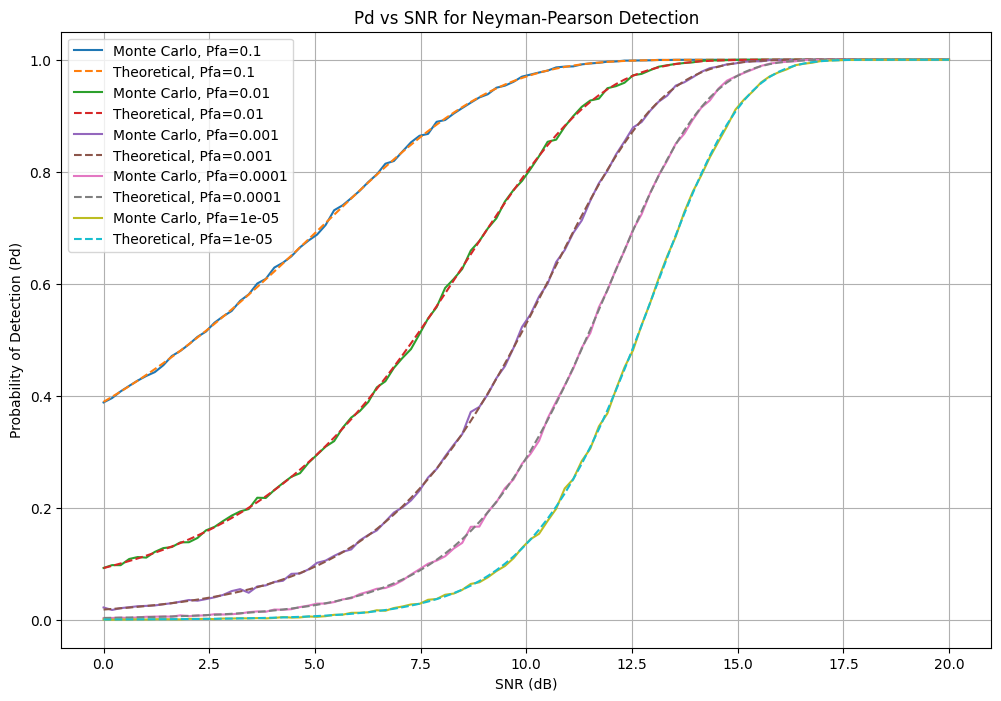

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
A = 5 
N = 1
false_alarm_probs = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5] 
SNR_dB = np.linspace(0, 20, 100)
SNR = 10 ** (SNR_dB / 10)

num_trials = 10000 

Pd_monte_carlo = np.zeros((len(false_alarm_probs), len(SNR)))
Pd_theoretical = np.zeros((len(false_alarm_probs), len(SNR)))

for i, Pfa in enumerate(false_alarm_probs):
    gamma = norm.ppf(1 - Pfa)
    for j, snr in enumerate(SNR):
        sigma2 = N * A**2 / snr
        sigma = np.sqrt(sigma2)

        noise = np.random.normal(0, sigma, (num_trials, N))
        signal = A + noise 
        test_statistic = np.sum(signal, axis=1) 
        detections = test_statistic > gamma * sigma / np.sqrt(N) 
        Pd_monte_carlo[i, j] = np.mean(detections)  

       
        Pd_theoretical[i, j] = 1 - norm.cdf((gamma * sigma / np.sqrt(N) - N * A) / (np.sqrt(N) * sigma))

plt.figure(figsize=(12, 8))
for i, Pfa in enumerate(false_alarm_probs):
    plt.plot(SNR_dB, Pd_monte_carlo[i], label=f"Monte Carlo, Pfa={Pfa}")
    plt.plot(SNR_dB, Pd_theoretical[i], '--', label=f"Theoretical, Pfa={Pfa}")

plt.xlabel("SNR (dB)")
plt.ylabel("Probability of Detection (Pd)")
plt.title("Pd vs SNR for Neyman-Pearson Detection")
plt.legend()
plt.grid()
plt.show()
